In [23]:
from spectrum import tiling_spectrum
SIZE = 5
spectra = tiling_spectrum(size = SIZE)
len(spectra)

476

In [24]:
from spectrum import SpectrumParityGraph
#NOTE: tiling_spectrum returns spectrum of tiling with exact size
all_spectra = set()
for size in range(SIZE + 1):
    spectra = tiling_spectrum(size = size)
    TU_blocker = set() #NOTE: its a TU blockers
    for spectrum in spectra:
        pg = SpectrumParityGraph(spectrum)
        if not pg.is_bipartite():
            TU_blocker.add(spectrum) 
    all_spectra.update(TU_blocker)
len(all_spectra)

318

In [25]:
from spectrum import TemplateFinder
sorted_spectra = sorted(all_spectra, key=lambda s: sum(s[-1]))
print(f"stage 0: {len(sorted_spectra)} spectra")

finder_1 = TemplateFinder(((0, 0, 0), (0, 0, 1), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)))
sorted_spectra = [spectrum for spectrum in sorted_spectra if not finder_1.exists_in(spectrum)]
print(f"stage 1: {len(sorted_spectra)} spectra")

finder_2 = TemplateFinder(
    ((0, 0, 0, 0),
     (1, 0, 0, 0),
     (1, 0, 0, 1),
     (1, 0, 1, 0),
     (1, 0, 1, 1),
     (1, 1, 0, 0),
     (1, 1, 1, 0),
     (1, 1, 1, 1)))
sorted_spectra = [spectrum for spectrum in sorted_spectra if not finder_2.exists_in(spectrum)]
print(f"stage 2: {len(sorted_spectra)} spectra")

finder_3 = TemplateFinder(
    ((0, 0, 0, 0),
     (0, 0, 0, 1),
     (0, 1, 0, 0),
     (0, 1, 0, 1),
     (0, 1, 1, 0),
     (0, 1, 1, 1),
     (1, 0, 0, 0),
     (1, 1, 0, 0),
     (1, 1, 1, 0),
     (1, 1, 1, 1)))
sorted_spectra = [spectrum for spectrum in sorted_spectra if not finder_3.exists_in(spectrum)]
print(f"stage 3: {len(sorted_spectra)} spectra")

finder_4 = TemplateFinder(
    ((0, 0, 0, 0),
     (0, 1, 0, 0),
     (0, 1, 0, 1),
     (0, 1, 1, 0),
     (0, 1, 1, 1),
     (1, 0, 0, 0),
     (1, 1, 0, 0),
     (1, 1, 1, 0),
     (1, 1, 1, 1)))
sorted_spectra = [spectrum for spectrum in sorted_spectra if not finder_4.exists_in(spectrum)]
print(f"stage 4: {len(sorted_spectra)} spectra")

if sorted_spectra:
    print("Remaining spectra:")
    for spectrum in sorted_spectra:
        print(spectrum)
else:
    print("No remaining spectra.")

stage 0: 318 spectra
stage 1: 40 spectra
stage 2: 18 spectra
stage 3: 7 spectra
stage 4: 0 spectra
No remaining spectra.


from collections import defaultdict
from spectrum import get_inequalities
ans = defaultdict(set)

for spectrum in spectra:
    inequalities = get_inequalities(spectrum)
    for ray in inequalities:
        indexes = [i for i in range(len(ray)) if ray[i] != 0]
        cut_ray = tuple(ray[i] for i in indexes)
        cut_spec = tuple(sorted({tuple(cam_spec[i] for i in indexes) for cam_spec in spectrum}))
        ans[cut_ray].add(cut_spec)

len(ans)

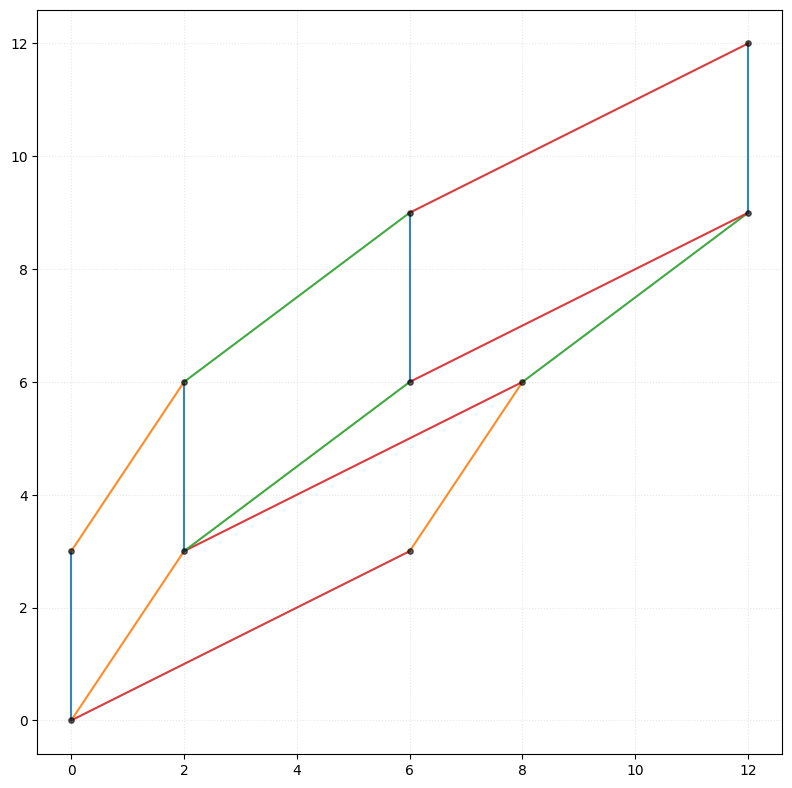

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

spectrum =          ((0, 0, 0, 0),
     (0, 0, 0, 1),
     (0, 1, 0, 0),
     (0, 1, 0, 1),
     (0, 1, 1, 0),
     (0, 1, 1, 1),
     (1, 0, 0, 0),
     (1, 1, 0, 0),
     (1, 1, 1, 0),
     (1, 1, 1, 1))

def zonogon_projection(vec):
    return np.array([2 * sum(i * vec[i] for i in range(len(vec))), (len(vec) - 1) * sum(vec)])

positions = {v: zonogon_projection(v) for v in spectrum}

cmap = plt.cm.tab10
colors = [cmap(i) for i in range(7)]

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal', 'box')

for a, b in combinations(spectrum, 2):
    diff = [i for i, (x, y) in enumerate(zip(a, b)) if x != y]
    if len(diff) == 1:
        i = diff[0]
        pa, pb = positions[a], positions[b]
        ax.plot([pa[0], pb[0]], [pa[1], pb[1]], color=colors[i], linewidth=1.5, alpha=0.9)

for v, p in positions.items():
    ax.scatter(p[0], p[1], s=15, color="black", alpha=0.6, zorder=3)

ax.grid(True, linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()